# regresión lineal con datos ficticios
    * y= a + b*x
    * x = 100 valores aleatorios distribuidos según una normal (1.5 , 2.5)
    * y estimada = 5 + 1.9 * x + e
    * e = estará distribuido según una normal (0 , 0.8)
 

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.rand(100)

In [3]:
error = 0 + 0.2 * np.random.randn(100) ##error

In [4]:
y_est = 5 + 1.9 * x    ##datos estimados

In [5]:
y_obs = 5 + 1.9 * x + error  ##datos observados o datos reales o datos actuales

In [6]:
x_list = x.tolist()  
y_est_list = y_est.tolist()
y_obs_list = y_obs.tolist()

data = pd.DataFrame(
    {
        "x":x_list,
        "y_obs":y_obs_list,
        "y_est": y_est_list
    }
)


In [7]:
data.head()

,x,y_obs,y_est
0,3.366552,11.212153,11.396450
1,2.362173,9.152838,9.488128
2,2.837905,10.342302,10.392019
3,1.852989,8.556153,8.520679
4,2.890894,10.255854,10.492698


In [8]:
import matplotlib.pyplot as plt

In [9]:
y_mean = [np.mean(data["y_obs"]) for i in range(1,len(data)+1) ] ##promedio de los datos observados

Text(0.5, 1.0, 'valor observado vs valor estimado')

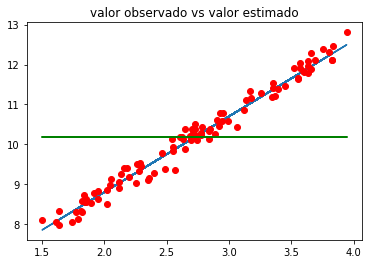

In [10]:
%matplotlib inline
plt.plot(data["x"],data["y_est"])
plt.plot(data["x"],data["y_obs"],"ro")
plt.plot(x, y_mean ,"g")

plt.title("valor observado vs valor estimado")

In [11]:
data["SSR"] = (np.mean(data["y_obs"]) - data["y_est"] )**2
data["SSD"] = (data["y_obs"] - data["y_est"] )**2
data["SST"] = (np.mean(data["y_obs"]) - data["y_obs"] )**2

In [12]:
data.head()

,x,y_obs,y_est,SSR,SSD,SST
0,3.366552,11.212153,11.396450,1.491430,0.033965,1.075255
1,2.362173,9.152838,9.488128,0.472079,0.112419,1.045241
2,2.837905,10.342302,10.392019,0.047007,0.002472,0.027920
3,1.852989,8.556153,8.520679,2.737466,0.001258,2.621340
4,2.890894,10.255854,10.492698,0.100800,0.056096,0.006504


In [13]:
SSR = sum(data["SSR"]) ##suma de los cuadrados de la regresión
SSD = sum(data["SSD"]) ##suma de la diferencia de los cuadrados
SST = sum(data["SST"]) ##suma de los cuadrados totales

In [14]:
SSR 

155.19082105861233

In [15]:
SSD

3.559947336087059

In [16]:
SST

162.89758708762437

In [17]:
R2 = SSR/SST  ## R cuadrado

In [18]:
R2

0.9526895016261567

### obteniendo la recta de regresión
    *y = a + b * x
    *a = mean(y) - b * mean(x)
    *b = [sumatoria(x-mean(x)) * (y-mean(y))] / sumatoria (x - mean(x))**2

In [20]:
x_mean = np.mean(data["x"])       ## promedios de x
y_mean = np.mean(data["y_obs"])   ## promedios de data[obs]
x_mean,y_mean

(2.7099370368766524, 10.175208486962957)

In [24]:
##obtención de la componente beta
beta_numerador = (data["x"]-x_mean) * (data["y_obs"]-y_mean)
beta_denominador = (data["x"]-x_mean)**2
beta = sum(beta_numerador)/sum(beta_denominador)
beta

1.9262451040091415

In [26]:
##obtención de la componente alfa
alfa = y_mean - (beta * x_mean)
alfa

4.955205537506265

In [28]:
##el modelo lineal obtenido por regresión es: y = 4.955205537506265 + (1.9262451040091415 * data["x"])
data["y_model"] = alfa + (beta * data["x"])
data.head()

,x,y_obs,y_est,SSR,SSD,SST,y_model
0,3.366552,11.212153,11.396450,1.491430,0.033965,1.075255,11.440011
1,2.362173,9.152838,9.488128,0.472079,0.112419,1.045241,9.505329
2,2.837905,10.342302,10.392019,0.047007,0.002472,0.027920,10.421705
3,1.852989,8.556153,8.520679,2.737466,0.001258,2.621340,8.524517
4,2.890894,10.255854,10.492698,0.100800,0.056096,0.006504,10.523776


In [34]:


SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_obs"])**2)
SST = sum((data["y_obs"]-y_mean)**2)

In [35]:
SSR,SSD,SST

(159.43655465975831, 3.4610324278659372, 162.89758708762437)

In [36]:
R2 = SSR/SST
R2

0.9787533229328662